# 1 - Probability and Randomness

Welcome to the first session where we will be digging into some of the most important concepts in data science and analysis. Hopefully you have now completed the mini-series on an introduction to the Python programming language. We covered a lot in a very short space of time so don't worry if you don't remember it all - there will be lots of opportunities to practice and we won't expect you to have a perfect memory of everything we did already.  

I would also like to say that programming is not easy, especially at the start. There will be times when you get really annoyed because you don't understand why something doesn't work - that's totally normal. Programming takes time to learn, and no one picks it up instantly - even if some people make it look easy. But the payoff is **really** worth the effort. If you stick with it, you **will** have a moment where it just clicks, and suddenly you realise you can do *anything* with it. 

Coding is a creative process. It's about solving problems *your* way. Don't be afraid to experiment and try different things. Everything you make you can build on top of, so you will be surprised how quickly you improve. 

That said, let's move on to the topic of this week: probability. 

## What is probability?

What is probability and why is it important to learn about when we study data science? 

You probably sometimes wonder in real-life situations what the probability is of some event happening. For example, what is your probability of winning the lottery if you buy a ticket tomorrow? Or what is the probability that the sun is shining in mid-July next year in Edinburgh? 

We use probability to talk about the likelihood of unknown events occurring in the future. This is very central to the study of data science. As data scientists, we want to make predictions about what will happen in the future, given some data about the past. Therefore, probability is an essential tool for us. 

As mathematicians, we have to be precise about how we talk about probability. For any unknown event, we can assign it a number between 0 and 1 where 

* 0 means the event is impossible
* Anything from 0 to 0.5 means the event is possible, but unlikely
* 0.5 means equal chance that the event happens and it doesn't happen. 
* Anything from 0.5 to 1 means the event is likely, but not certain. 
* 1 means the event in certain

The meaning of this probability is 

> *"If I repeat the event many times, in what fraction would I expect the outcome of interest to occur?"*

Take an example. If I randomly select a card from a regular deck, what is the probability that the suit is hearts? We know that 1/4 of all the cards are hearts, so the probability must be a quarter. If I repeated this 1000 times, I would expect that roughly 250 of the cards I select will be hearts. 

![](images/suits.png)


## Exercise 1

Take a look at the graph below. Each time you slick the button, it simulates selecting a card from a deck. We can count the number of spades (♠️), clubs (♣️), diamonds (♦️) hearts (♥️) that we get over all and plot it as a bar chart. What do you notice?



In [1]:
# RUN THIS CELL :)
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
np.set_printoptions(precision=3, linewidth=500, threshold=500, suppress=True)

In [2]:
# AND THIS ONE :P
%matplotlib notebook


<IPython.core.display.Javascript object>


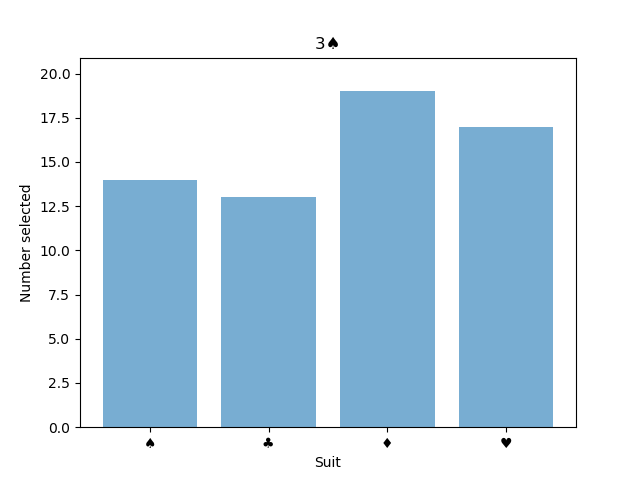

Button(description='Select a card', style=ButtonStyle())

Output()

In [3]:
# NOW RUN ME!! :D

from scripts.lesson1 import make_graph_1

make_graph_1()

## Discrete vs continuous probability

Hopefully this is fairly understandable for you - I guess you will have seen situations like this before in your maths classes at school. This is what's known as *discrete probability*. 

> The word discrete is used to describe things that are individually distinct. For example, you can have only buy a discrete number of apples at the supermarket. We call this situation discrete probability because there are only 4 distinct possibilities for card suit: ♠️, ♣️, ♦️, ♥️. 

More examples of discrete probability could be the number you get when you roll a dice, or the color of a pair of socks you randomly take from your draw. We can describe the probability *distribution* by just saying what the probability is of each event. 

| Event | Probability |
| :---: | :---------: |
|   ♠️   | 0.25  |
|   ♣️   | 0.25  |
|   ♦️   | 0.25  |
|   ♥️   | 0.25  |

The other type of probability is called *continuous probability*. This describes things that are not discrete, but continuous

> The word continuous describes things that do not come in distinct lumps but instead have a free-flowing quality. The amount of water you have in a cup is continuous: you can have *any* amount of water, not a number.  

Discrete probability is useful in many situations, but continuous probability is also very useful. Let's take an example. 

> You are standing between two walls that are separated by 2m (one wall is as $x=0$, and the other is at $x=2$). You take a tennis ball and throw it at one of the walls. It bounces back and fourth between the walls and slowly comes to a stop. How can we describe the probability about where the ball stops?

![](images/ball.gif)

Initially this might seem easy to answer. We could just say, "well, nowhere is particularly special, so it has an equal chance of stopping anywhere". This is absolutely true. But what if I asked, what is the probability that it stops *exactly* half way? The answer must be zero! Its essentially *impossible* for the ball to stop *exactly* half way. It might get **very** close, but if we have a ruler with perfect precision, it will always be out but at least a *tiny* bit. 

What if I asked, what is the probability that it stops in the first half, from $x=0$ to $x=1$. Well, logically the answer must be $0.5$ because surely it has an equal chance of stopping in the first and second half. That has a reasonable answer, whereas the first question doesn't...

What about if I asked, what is the probability that the ball stops somewhere between $x=1.5$ and $x=2$. The answer would be $0.25$, because the interval $x=1.5$ to $x=2$ covers a quarter of the total distance. 

# The uniform distribution 

What we have described is known as the *uniform distribution*. This means all points within our chosen interval have an equal chance of being selected. The probability of being between two points, say $a$ and $b$,  within that range is equal to the the distance between those points ($b-a$) divided by the total range which in this case is $(2 - 0) = 2$

$$
\begin{align}
P(\text{ball is between}\; a \; \text{and} \; b) &= \frac{b-a}{2} \\[0.3cm]
P(\text{ball is between}\; 0 \; \text{and} \; 2) &= \frac{2-0}{2} = 1 \\[0.3cm]
P(\text{ball is between}\; 1 \; \text{and} \; 2) &=  \frac{2-1}{2} = \frac{1}{2} = 0.5 \\[0.3cm]
P(\text{ball is between}\; 0.5 \; \text{and} \; 1.5) &= \frac{1.5 - 0.5}{2} = \frac{1}{2} = 0.5 \\[0.3cm]
P(\text{ball is between}\; 0.2 \; \text{and} \; 1.8) &= \frac{1.8 - 0.2}{2} = \frac{4}{5} = 0.8 \\[0.3cm]
\end{align}
$$

Question: What is the probability that the ball is between $0.3$ and $0.7$?

## Exercise 2

Write a python function called `prob_between` which takes in two arguments `a` and `b`. Return the probability that the ball stops between `a` and `b`. Once you have written it, run the cell below it to test!



In [ ]:
def prob_between(a, b):
    # YOUR CODE HERE
    return 

In [ ]:
# run this cell to test your function!

from scripts.lesson1 import exercise_2_test

exercise_2_test(prob_between)

## The uniform probability distribution function

We can visualise the probability of a uniform distribution as an *area under a rectangle* where the rectangle height is one divided by the total interval size. This is the essence of the uniform distribution. 

## Exercise 3

Interact with the graph below and try to get a feel for the uniform distribution

<IPython.core.display.Javascript object>


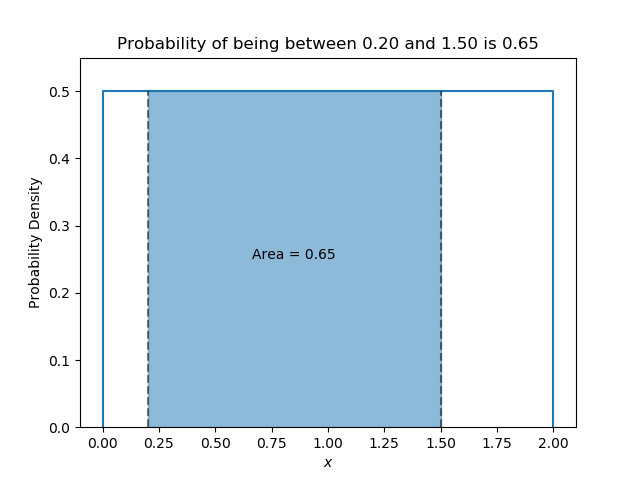

interactive(children=(FloatSlider(value=0.2, description='A', max=2.0, step=0.001), Output()), _dom_classes=('…

interactive(children=(FloatSlider(value=1.5, description='B', max=2.0, step=0.001), Output()), _dom_classes=('…

In [4]:
from scripts.lesson1 import make_graph_2

make_graph_2()

Mathematically, we can describe the uniform distribution by the following function:

$$
\text{A uniform distribution over an interval} \; [A, B] \; \text{has a probability distribution defined as} \\[0.5cm]
f(x) = \cases{ \frac{1}{B - A}  \quad \text{if} \; A \leq x \leq B \\[0.2cm] \; \; 0 \quad \;\; \text{otherwise}}
$$

## Generating uniformly distributed random numbers 

In Python we simulate random processes using NumPy's random module. We can also plot the *histogram* using Matplotlib. Here's how we can simulate drawing numbers from a uniform distribution

In [ ]:
a = 0    # the interval start
b = 2    # the interval end
N = 20   # the number of random numbers to generate

random_numbers = np.random.uniform(a, b, N)
print(f'Here are {N} random numbers uniformly distributed between {a} and {b}\n')
print(random_numbers)

![](images/uniform.png)

Here's how we can plot a histogram of these random numbers using matplotlib

<IPython.core.display.Javascript object>


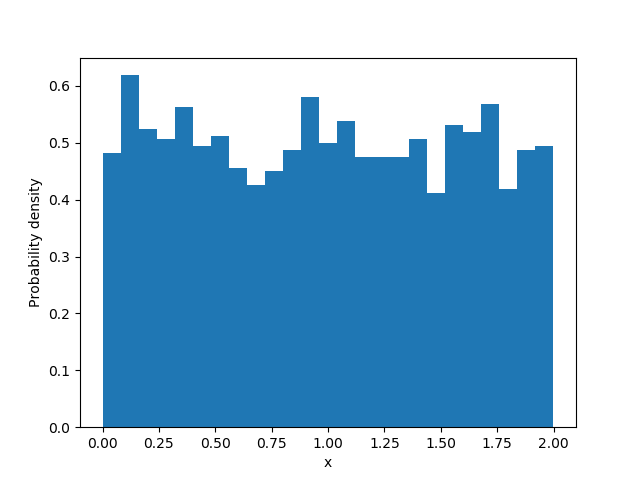

Text(0, 0.5, 'Probability density')

In [5]:
a = 0    # the interval start
b = 2    # the interval end
N = 2000   # the number of random numbers to generate

random_numbers = np.random.uniform(a, b, N)

# make a new figure
plt.figure()

# plot a density histogram in this figure with 25 bins
plt.hist(random_numbers, bins=25, density=True)

# add some axis labels
plt.xlabel('x')
plt.ylabel('Probability density')


## Exercise 4

Try increasing the number of random numbers that get generated. What do you notice about the shape of the histogram?


## The Normal Distribution

Consider a situation where you measure the height of a random person in the population with a very precise ruler. 

![](images/height.png)

What is the probability that they have a height of *exactly* 1.7m? Like the situation with the ball, the probability of having a height that is *exactly* anything is zero! However, what is the probability that they have a height that is between 1.7m and 1.8m? Well, this is now definitely greater than zero. 

The example of population height is one of many examples that follow this general pattern: there is some average height which most people are close to. Then, there are a few people that are much taller than this and a few people that are much smaller than this. Taller and taller people are less and less likely to see, as are shorter and shorter people. 

This sort of situation is often well-described by the *normal distribution*. Just as the uniform distribution had two parameters, $A$ and $B$ which told us the uniform interval, the normal distribution also has two parameters which tell us everything we need to know. These are 

$$
\begin{align}
&1) \; \text{The distribution mean,}\; \mu \\
&2) \; \text{The distribution width,}\; \sigma
\end{align}
$$

The first parameter $\mu$ (pronounced "mew") tells us where the centre of the distribution is. This gives us the *mean* (or average) height. This is where most people can be found. The second parameter $\sigma$ (pronounced "sigma") gives us the *width* of the distribution. This is also known as the "standard deviation" and tells us how likely or unlikely it is that we will find individuals far away from the mean. A large value of $\sigma$ means that we have a wide distribution and it's not unlikely that we will find very tall and very short people. On the other hand, a small value of $\sigma$ means everyone can be found very close to the mean. 

The probability distribution function for the normal distribution is as follows

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

You don't need to worry too much about exactly what that means - just know that it is a function which has a particular shape which you will see in a minute. 

Just like before, the way we can calculate the probability of finding someone between two values is to take the area under this curve between those values. 

## Exercise 5

Run the cell below to see what the normal distribution looks like. Here, we have assumed that $\mu=170$cm and $\sigma=6.5$cm. Using the graph, can you find the probability that a randomly selected person from the population is between 160 and 170cm? 


<IPython.core.display.Javascript object>


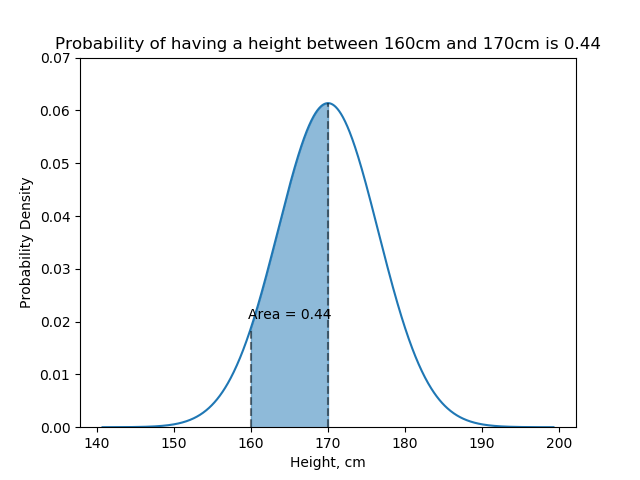

interactive(children=(IntSlider(value=160, description='height1', max=200, min=140), Output()), _dom_classes=(…

interactive(children=(IntSlider(value=170, description='height2', max=200, min=140), Output()), _dom_classes=(…

In [6]:
from scripts.lesson1 import make_graph_3

make_graph_3()


As you can see from the graph, the uniform distribution has a very distinct shape. It's also sometimes called "the bell curve" because it looks a little like a bell. I like to think it looks more like the sorting hat from Harry Potter... You may also find this distribution called the "Gaussian" distribution, because it was discovered by a German mathematician named Carl Friedrich Gauss. 


## Generating normally distributed random numbers

In Python, we can also generate numbers from a normal distribution. We do this in a very similar way to how we generated the uniform random numbers before. 

In [ ]:
mu = 170       # the distribution mean
sigma = 6.5    # the distribution width
N = 20         # the number of random numbers to generate
 
random_numbers = np.random.normal(mu, sigma, N)
print(f'Here are {N} random numbers normally distributed with mean {mu} and standard deviation {sigma}\n')
print(random_numbers)

![](images/normal.png)

As before, we can also plot a histogram of these randomly generated numbers

<IPython.core.display.Javascript object>


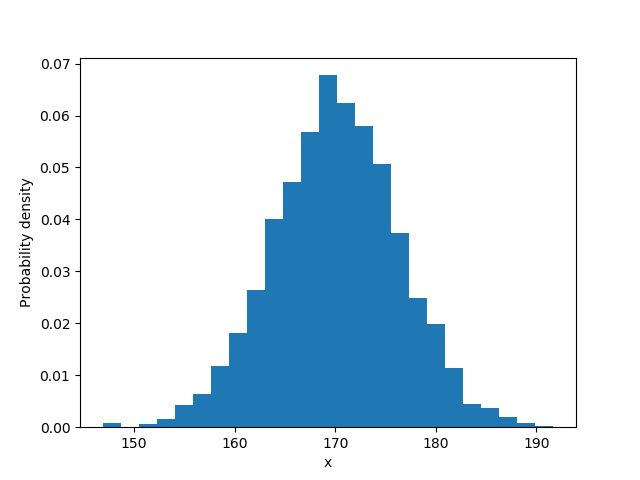

Text(0, 0.5, 'Probability density')

In [7]:
mu = 170       # the distribution mean
sigma = 6.5    # the distribution width
N = 2000       # the number of random numbers to generate
 
random_numbers = np.random.normal(mu, sigma, N)

# make a new figure
plt.figure()

# plot a density histogram in this figure with 25 bins
plt.hist(random_numbers, bins=25, density=True)

# add some axis labels
plt.xlabel('x')
plt.ylabel('Probability density')

## Exercise 6

Try increasing the number of random numbers that get generated, and also increasing the number of bins in the histogram. What do you notice about the shape of the histogram?


# The exponential distribution

One final example of a continuous probability distribution is the *exponential* distribution. This one isn't quite as common as the normal distribution or the uniform distribution, but it's important nevertheless. To explain this distribution, we are going to take a quick detour into the idea of nuclear decay. 

Have you every heard about nuclear radiation? Maybe you've seen pictures of glowing green metal, or heard about the Chernobyl disaster. What's actually happening is this. The nucleus of atoms are made up of protons (positively charged particles) and neutrons (particles with no electric charge). Elements are defined by the number of protons, for example, hydrogen, the most simple element, has one proton, helium has two etc, but each element can have a variable number of neutrons. 

Carbon is the element that has 6 protons in its atomic nucleus, but it can have 6, 7 or 8 neutrons. Carbon-14 (which has 6 protons, and 8 neutrons) is **unstable**: that means it wants to change its composition to reach a lower energy state. It can achieve this by turning one of its neutrons into a proton and releasing an electron (which is negatively charged). This means it now has 7 protons and 7 neutrons, which means it has turned from carbon to nitrogen. This is known as *nuclear decay*. 

$$
\text{C}_{6}^{14} \; \rightarrow \; \text{N}_{7}^{14} + e^{-} + \bar{\nu}
$$

![](images/nuclear_decay.gif)


Nuclear decay is a *truly random process*. If we have many many nuclei of carbon-14, we know that each one has a fixed probability of decaying per unit time. We measure this time using a *half life*. The meaning of the half life is the time it takes for half of the nuclei to decay. This means each nucleus has a 50% chance of decaying in one half life. 

The half life of carbon-14 is about 5700 years. This means, if we start with 16000 carbon-14 atoms, after 5700 years we would expect to find 8000 nuclei. Wait another 5700 years and we expect to find 4000 nuclei. Wait another 5700 years and we expect to find 2000 nuclei and so on. We say that the decay time of carbon-14 atom follows an *exponential distribution*. 

The exponential distribution is defined by the following probability density function

$$
f(x) = \frac{1}{\beta} e^{-x/\beta}, \quad \text{for} \; x \geq 0
$$

This distribution has only one parameter, $\beta$ (pronounced "beta") which is related to the half life. Larger $\beta$ means a longer half life and therefore longer average decay time. Again, we can find the probability of decay between two times by taking the area under this curve. 

We can use the radioactive decay of carbon-14 to tell the age of ancient living things! This is because old living matter like plants and trees has a constant proportion of carbon-14 in it. When it dies, the carbon-14 begins to decay. So by measuring the proportion of carbon-14 in a sample, we can work out how long it has been dead for!

## Exercise 7

Take a look at the interactive graph below, which shows the probability distribution for the decay time of carbon-14. 

* Can you find the probability that a carbon-14 nucleus decays in the first 10,000 years? 
* If we start with 500,000 atomic nuclei of carbon-14, how many do you expect will be left undecayed after 20,000 years?


<IPython.core.display.Javascript object>


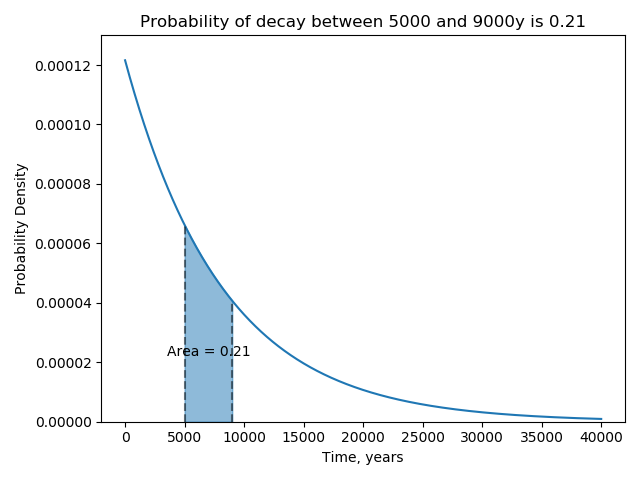

interactive(children=(IntSlider(value=5000, description='t1', max=40000, step=100), Output()), _dom_classes=('…

interactive(children=(IntSlider(value=9000, description='t2', max=40000, step=100), Output()), _dom_classes=('…

In [8]:
from scripts.lesson1 import make_graph_4

make_graph_4()

## Generating exponentially distributed random numbers

Just like before, we can generate random numbers that follow an exponential distribution. Can you guess how?

In [ ]:
beta = 5700 / np.log(2)      # the distribution parameter beta. Note! We can convert from half life by 
                             # multipying by log(2) (don't worry to much about this)
N = 20                       # the number of random numbers to generate

random_numbers = np.random.exponential(beta, N)

print(f'Here are {N} random numbers normally distributed with beta {beta:.2f}\n')
print(random_numbers)

![](images/exponential.png)

Once again, we can plot a histogram of these random numbers

<IPython.core.display.Javascript object>


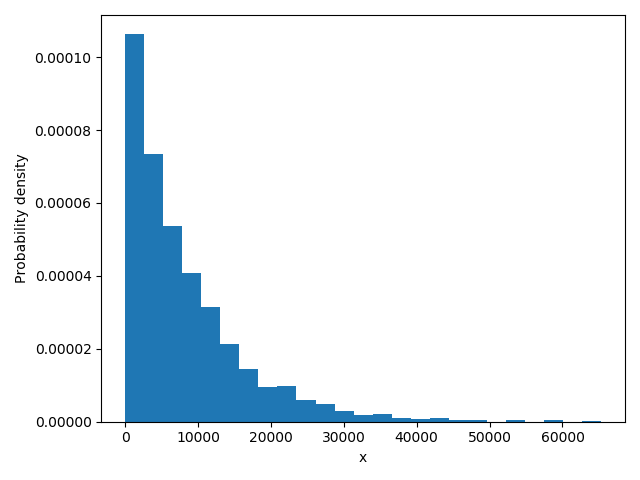

In [9]:
beta = 5700 / np.log(2)      # the distribution parameter beta. Note! We can convert from half life by 
                             # multipying by log(2) (don't worry to much about this)
N = 2000                       # the number of random numbers to generate
 
random_numbers = np.random.exponential(beta, N)

# make a new figure
plt.figure()

# plot a density histogram in this figure with 25 bins
plt.hist(random_numbers, bins=25, density=True)

# add some axis labels
plt.xlabel('x')
plt.ylabel('Probability density')
plt.tight_layout()

## Exercise 8

Try increasing the number of random numbers that get generated, and also increasing the number of bins in the histogram. What do you notice about the shape of the histogram?